In [1]:
import os
import sys 

PROJECT_ROOT = os.path.abspath('..')
sys.path.append(PROJECT_ROOT)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Heart Predication

In [3]:
heart = pd.read_csv('../datasets/heart/train-2.csv')

### Quick Look of Datasets

In [4]:
heart.shape

(1025, 14)

In [5]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Visualize the dataset

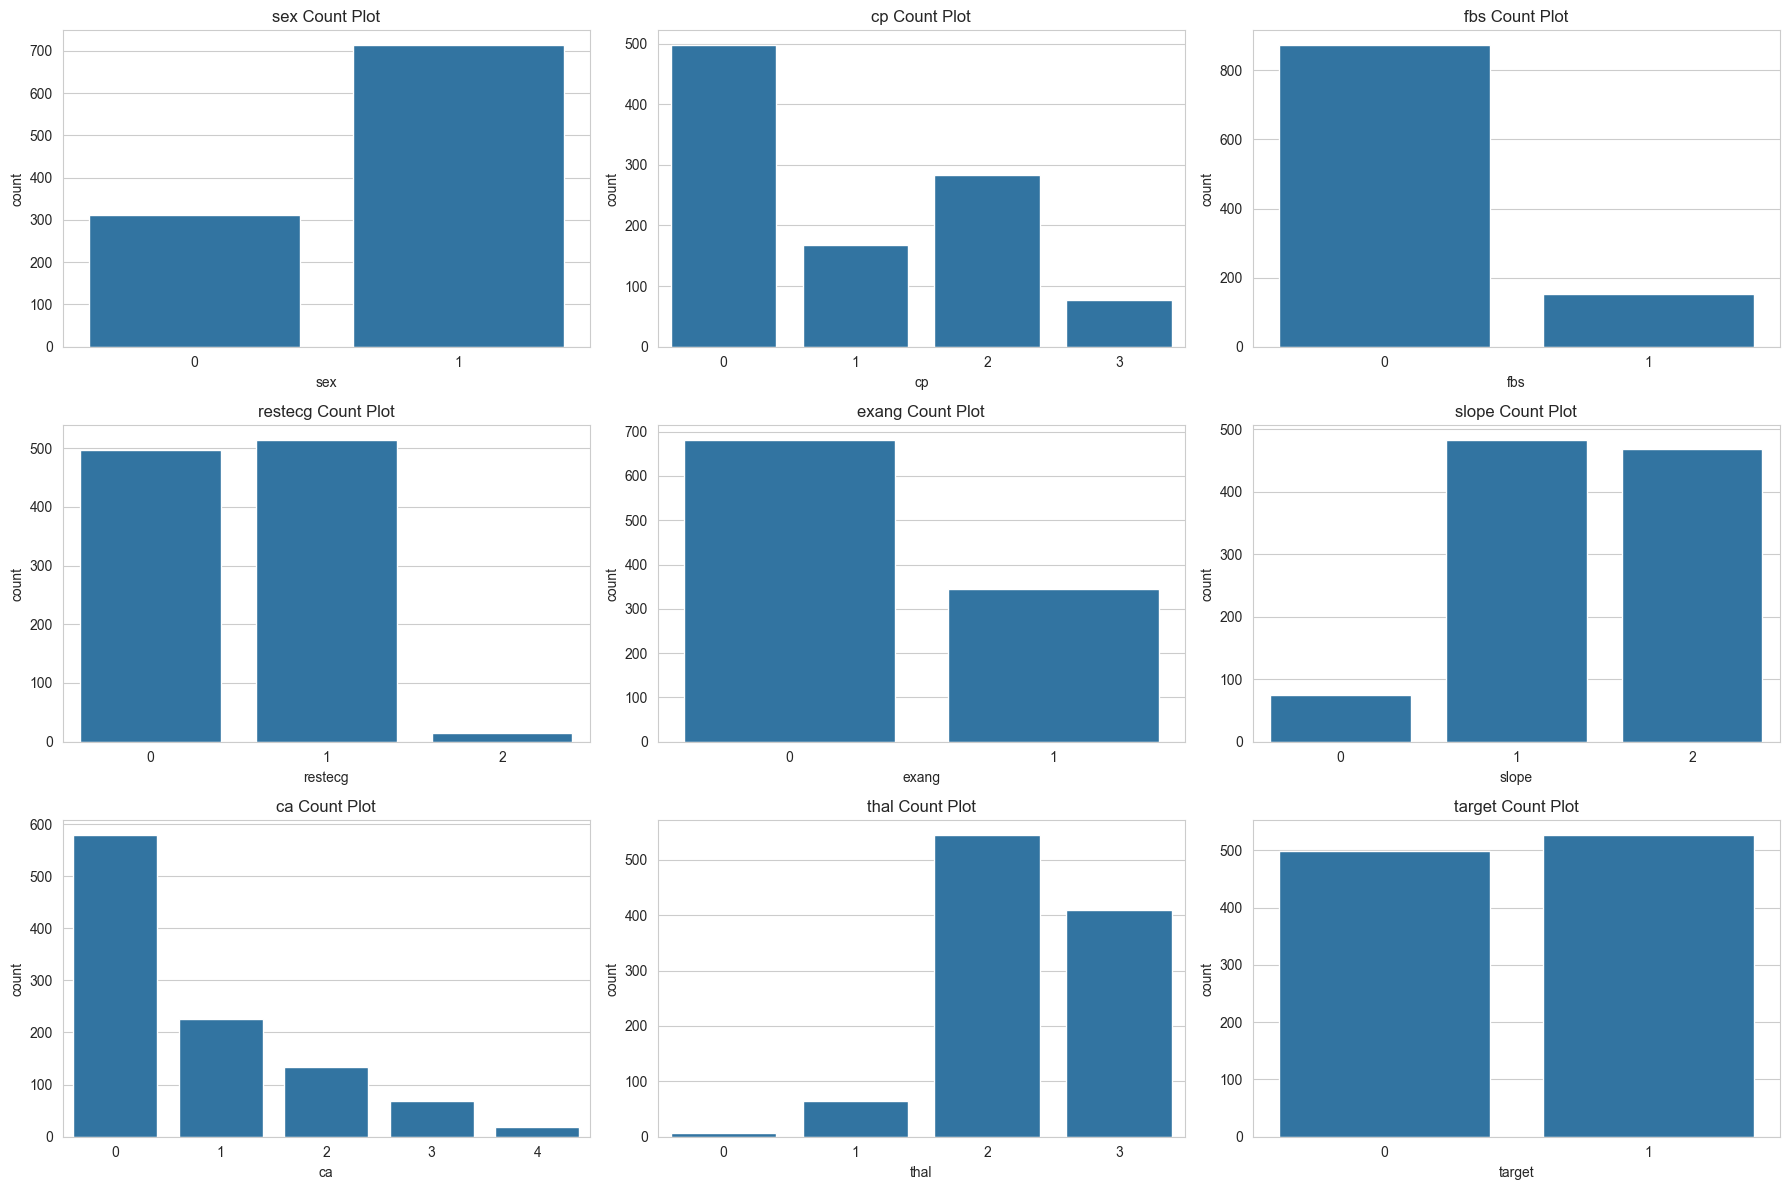

In [10]:
from src.visualization.plots import count_plot_multiple_features
count_plot_multiple_features(heart, cols=categorical_columns, n_cols=3)

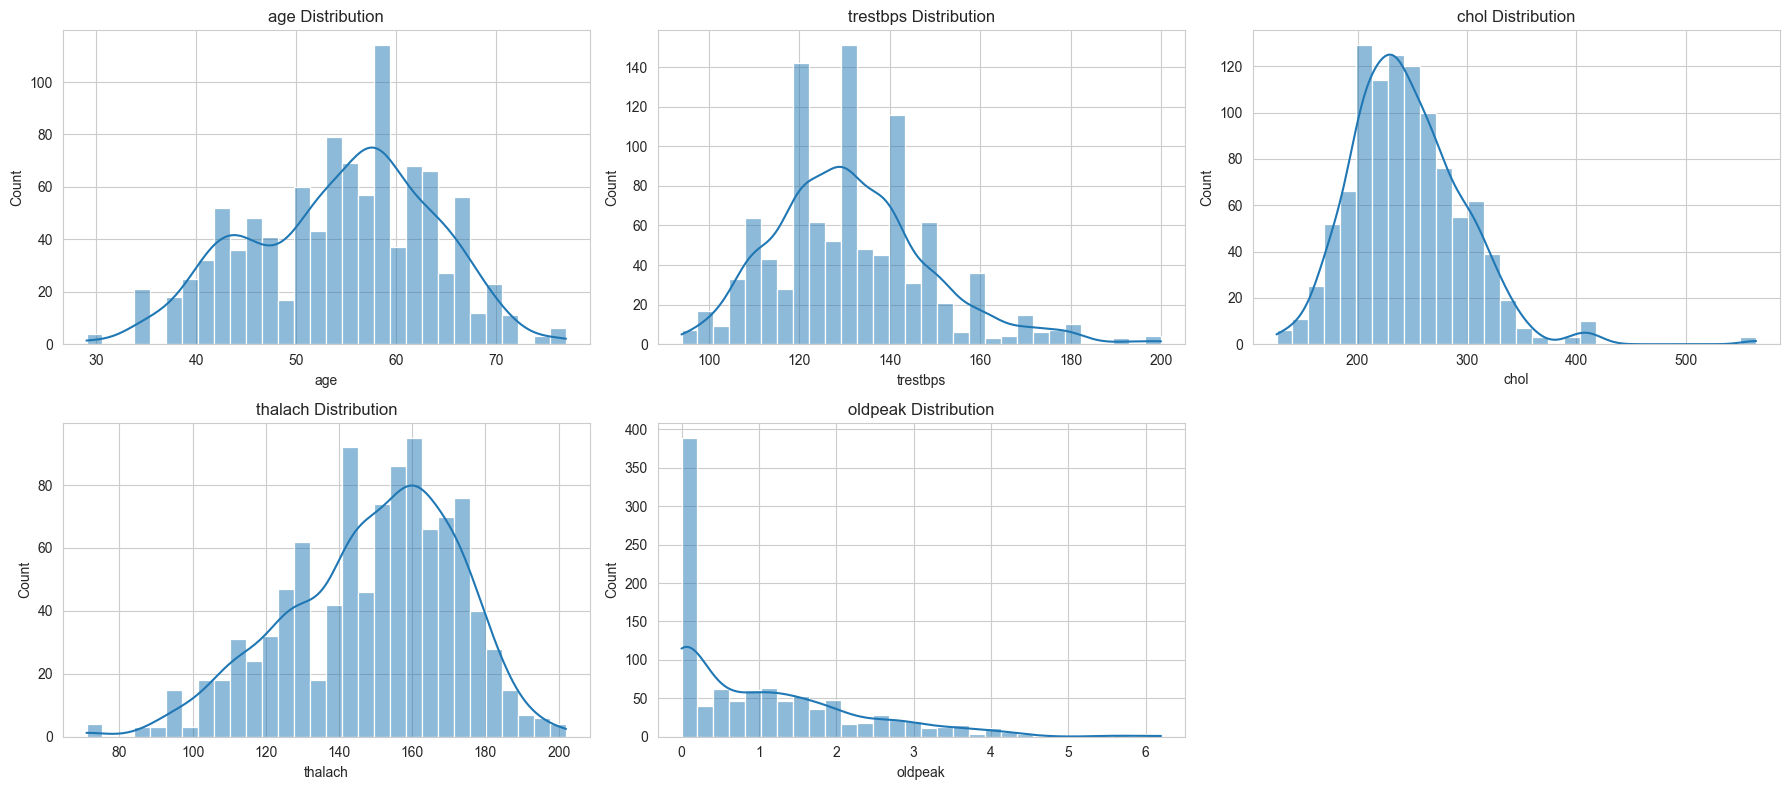

In [11]:
from src.visualization.plots import plot_multiple_features
plot_multiple_features(heart, cols=numerical_columns, n_cols=3)

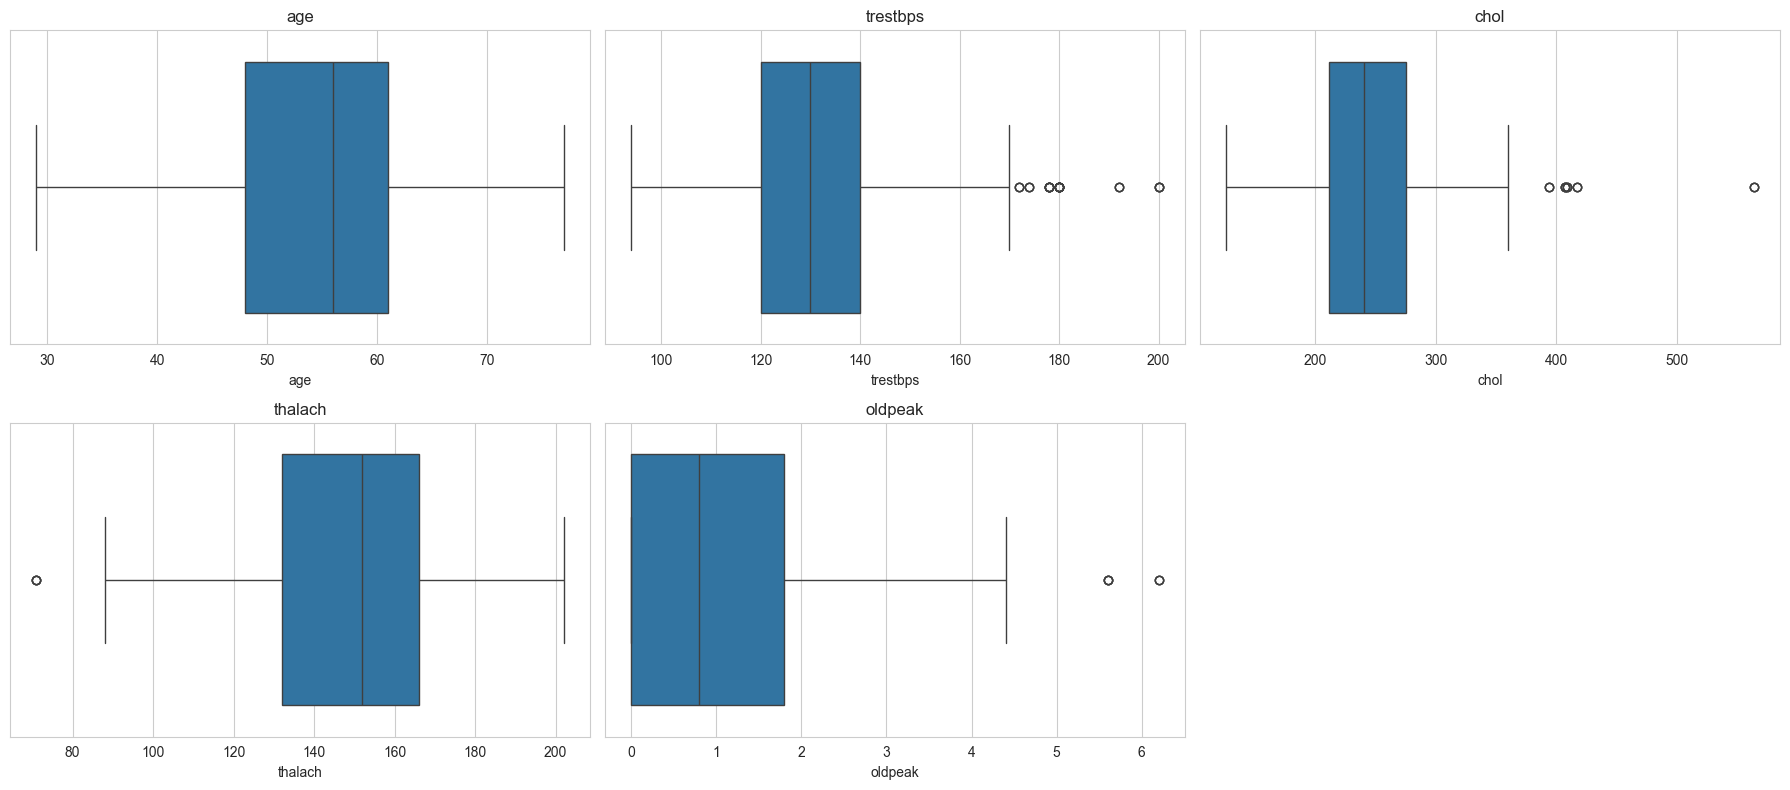

In [17]:
from src.visualization.plots import plot_multiple_boxplot
plot_multiple_boxplot(heart, numerical_columns, 3)


### Cleaning the dataset

In [22]:
heart_copy = heart.copy()

In [23]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    """
    Detect outliers using IQR method
    """
    outlier_indices = []
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices.extend(outliers.index.tolist())
        
        print(f"\n{col}:")
        print(f"  Lower bound: {lower_bound:.2f}")
        print(f"  Upper bound: {upper_bound:.2f}")
        print(f"  Number of outliers: {len(outliers)}")
    
    return list(set(outlier_indices))

outlier_indices = detect_outliers_iqr(heart_copy, numerical_columns)
print(f"\nTotal rows with outliers: {len(outlier_indices)}")

# Remove outliers
heart_copy.drop(outlier_indices, inplace=True)



age:
  Lower bound: 28.50
  Upper bound: 80.50
  Number of outliers: 0

trestbps:
  Lower bound: 90.00
  Upper bound: 170.00
  Number of outliers: 30

chol:
  Lower bound: 115.00
  Upper bound: 371.00
  Number of outliers: 16

thalach:
  Lower bound: 81.00
  Upper bound: 217.00
  Number of outliers: 4

oldpeak:
  Lower bound: -2.70
  Upper bound: 4.50
  Number of outliers: 7

Total rows with outliers: 57


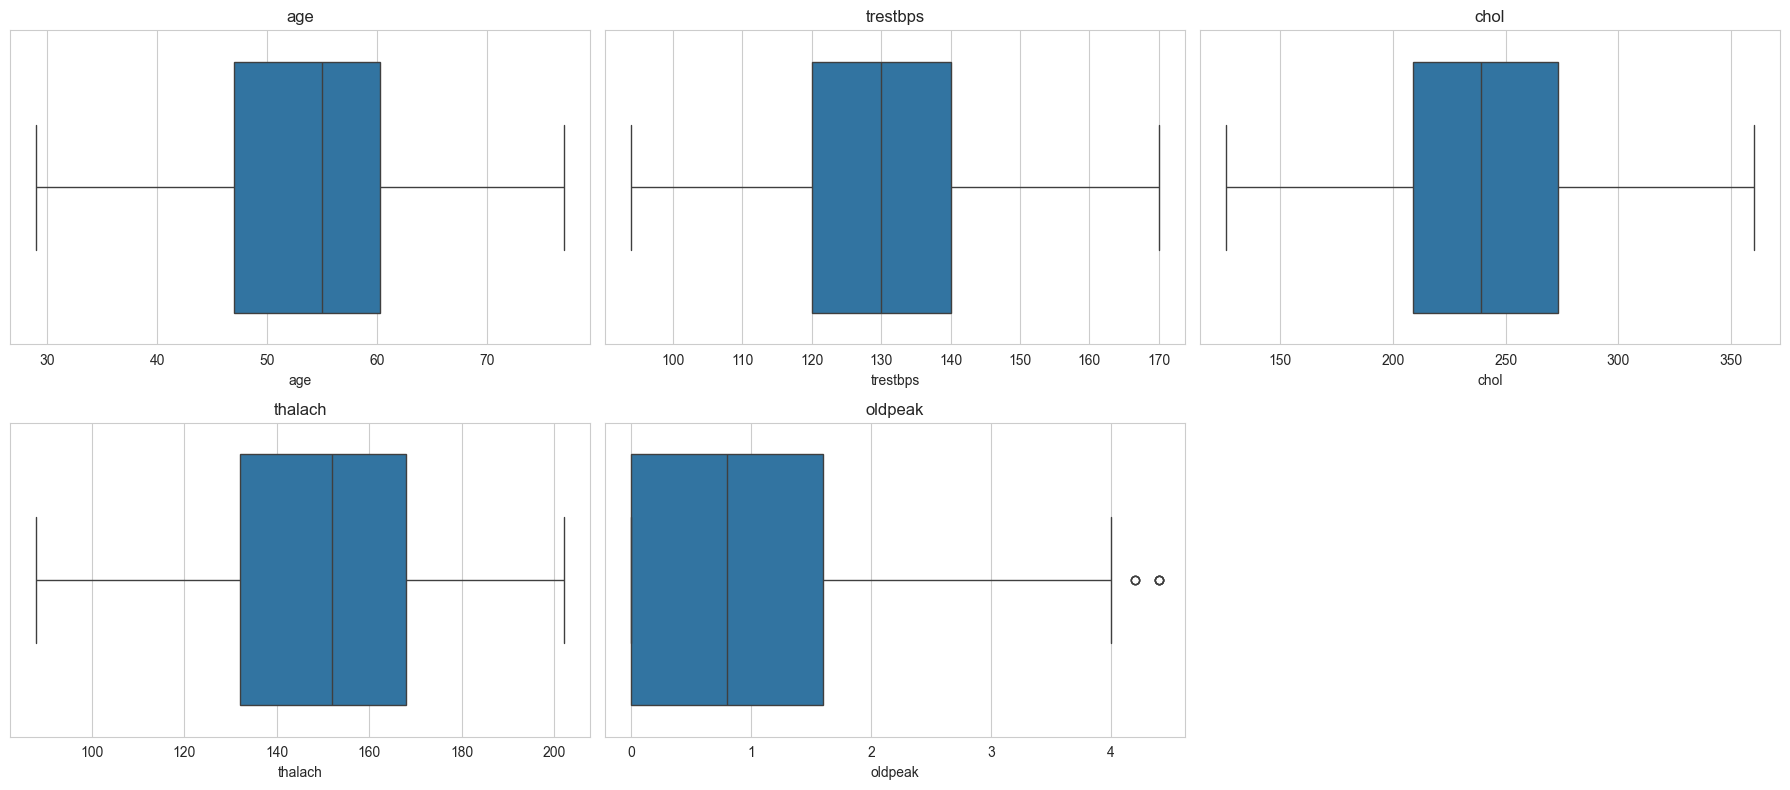

In [24]:
from src.visualization.plots import plot_multiple_boxplot
plot_multiple_boxplot(heart_copy, numerical_columns, 3)


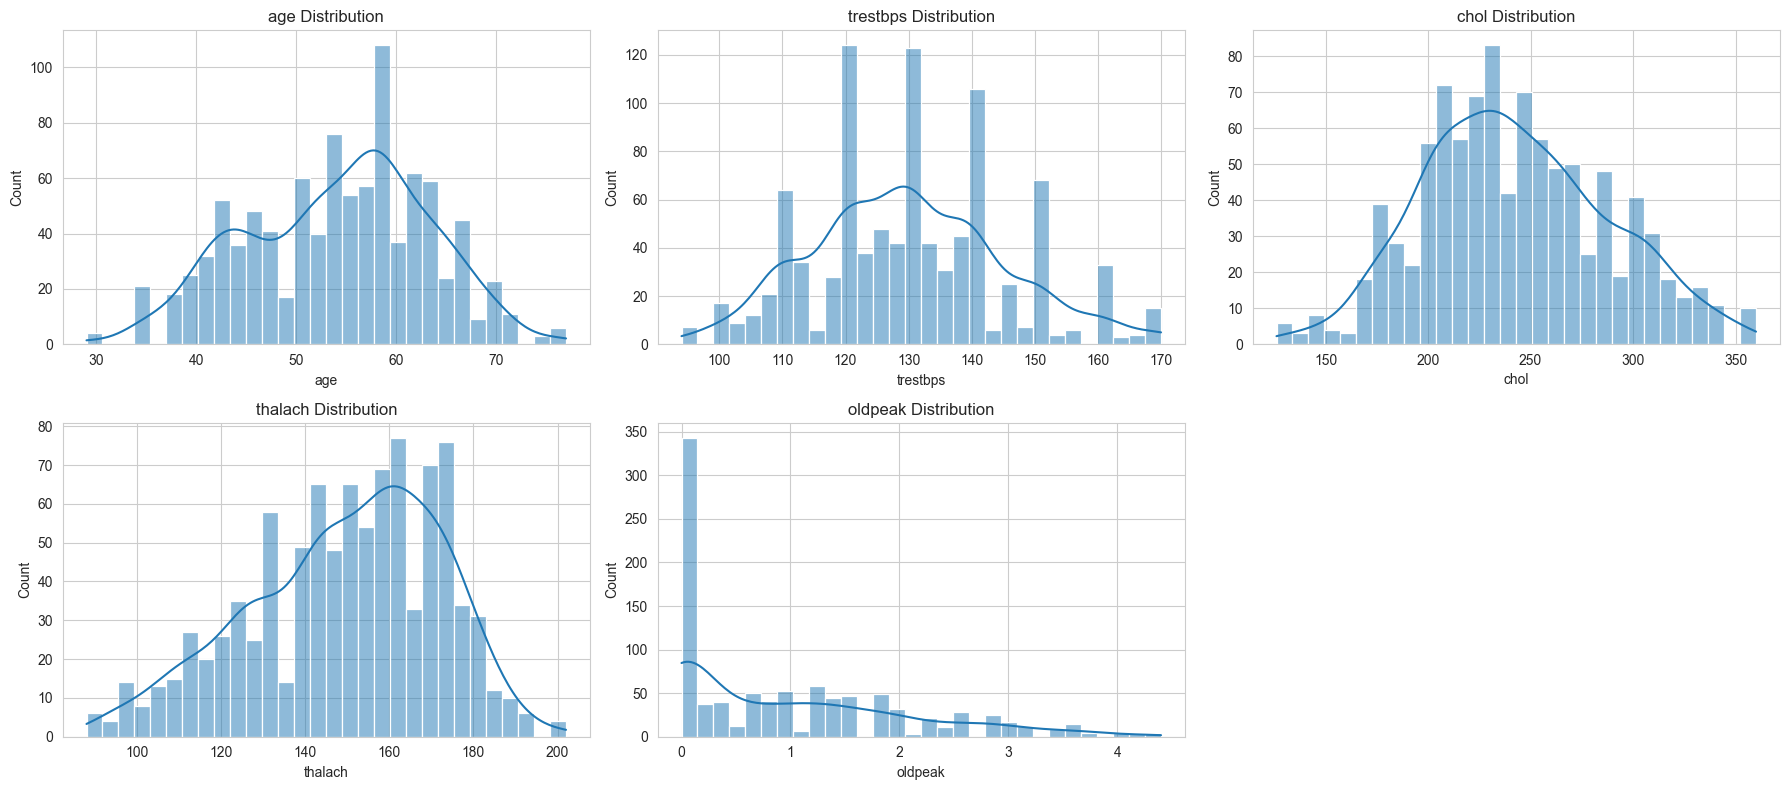

In [26]:
from src.visualization.plots import plot_multiple_features
plot_multiple_features(heart_copy, cols=numerical_columns, n_cols=3)

In [29]:
# Separate
X = heart_copy.drop(['target'], axis=1)
y = heart_copy['target']
X.shape, y.shape

((968, 13), (968,))